# Electrical Stability

## Imports

In [444]:
import logging

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Carga de Datos

In [445]:
def load_data(file_path):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        logging.error(f"Error loading data: {e}")
        return pd.DataFrame()

In [446]:
df = load_data('../data/Tema_16.csv') # Load the dataset

## Análisis exploratorio

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    9518 non-null   object 
 1   tau2    9508 non-null   float64
 2   tau3    9510 non-null   float64
 3   tau4    9510 non-null   float64
 4   p1      9516 non-null   float64
 5   p2      9509 non-null   float64
 6   p3      9509 non-null   float64
 7   p4      9509 non-null   float64
 8   g1      9511 non-null   float64
 9   g2      9509 non-null   float64
 10  g3      9510 non-null   float64
 11  g4      9508 non-null   float64
 12  stab    9510 non-null   float64
 13  stabf   9510 non-null   object 
dtypes: float64(12), object(2)
memory usage: 1.1+ MB


In [448]:
# find tau1 non numeric and non null values
df['tau1'][~pd.to_numeric(df['tau1'], errors='coerce').notnull() & df['tau1'].notnull()]

11      invalid_value
28      invalid_value
64      invalid_value
165     invalid_value
196     invalid_value
            ...      
9838    invalid_value
9870    invalid_value
9884    invalid_value
9906    invalid_value
9940    invalid_value
Name: tau1, Length: 100, dtype: object

In [449]:
# Transform tau1 into float and stabf into string
df['tau1'] = pd.to_numeric(df['tau1'], errors='coerce')

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    9418 non-null   float64
 1   tau2    9508 non-null   float64
 2   tau3    9510 non-null   float64
 3   tau4    9510 non-null   float64
 4   p1      9516 non-null   float64
 5   p2      9509 non-null   float64
 6   p3      9509 non-null   float64
 7   p4      9509 non-null   float64
 8   g1      9511 non-null   float64
 9   g2      9509 non-null   float64
 10  g3      9510 non-null   float64
 11  g4      9508 non-null   float64
 12  stab    9510 non-null   float64
 13  stabf   9510 non-null   object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [451]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,9418.000000,9508.000000,9510.000000,9510.000000,9516.000000,9509.000000,9509.000000,9509.000000,9511.000000,9509.000000,9510.000000,9508.000000,9510.000000
mean,6.262916,5.244768,5.248410,5.247679,4.331609,-1.249897,-1.250695,-1.249889,0.625221,0.525705,0.525133,0.523920,0.015830
std,10.086302,2.738029,2.741857,2.741789,5.675074,0.433278,0.432702,0.432560,1.008878,0.274289,0.274135,0.274258,0.036903
min,0.500793,0.501582,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.907193,2.879708,2.870172,2.871294,3.221693,-1.625225,-1.626675,-1.624413,0.288739,0.288725,0.287669,0.286650,-0.015425
50%,5.328759,5.236041,5.235974,5.250743,3.762752,-1.250501,-1.249917,-1.250992,0.530080,0.525747,0.524528,0.523747,0.017207
75%,7.695478,7.611048,7.622416,7.623121,4.300006,-0.873343,-0.875962,-0.874745,0.769924,0.763756,0.762486,0.760747,0.044958
max,99.994695,9.999837,9.999450,9.999443,58.644180,-0.500108,-0.500072,-0.500025,9.999371,0.999944,0.999839,0.999930,0.109403


In [452]:
df.isnull().sum()

tau1     592
tau2     502
tau3     500
tau4     500
p1       494
p2       501
p3       501
p4       501
g1       499
g2       501
g3       500
g4       502
stab     500
stabf    500
dtype: int64

In [453]:
# total of unique rows that have null values
df[df.isnull().any(axis=1)].shape[0]

5237

In [454]:
df.duplicated().sum()

np.int64(10)

In [455]:
df[df.duplicated()]

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
10000,2.859063,9.454049,4.583073,2.033054,4.906682,-1.594677,-1.377196,-1.934809,0.744892,0.238196,0.383711,0.454606,-0.027164,stable
10001,8.503371,6.323039,6.178393,4.297442,3.618125,-1.216116,-1.852993,-0.549015,0.748400,NaN,0.636112,NaN,0.072832,unstable
10002,99.994695,5.718503,9.788810,1.783620,3.858277,-0.632223,-1.981696,-1.244358,0.143691,0.298940,0.365651,0.900329,-0.050311,stable
10003,6.706000,9.525422,3.281098,0.586626,3.467833,NaN,NaN,NaN,9.999371,0.094124,0.993008,NaN,-0.039749,stable
10004,7.685556,NaN,4.788277,8.255404,3.820313,-0.572640,-1.332654,-1.915019,0.509561,0.951463,0.986001,0.485220,0.054437,unstable
10005,9.848979,3.030317,6.065518,0.534793,3.018903,-1.692559,-0.606766,-0.719578,NaN,0.365376,0.688527,0.631565,-0.005955,stable
10006,9.198426,4.420654,1.241993,3.160068,58.644180,-1.457144,-1.284235,-0.524844,0.771399,0.790209,0.245220,0.724014,0.018430,unstable
10007,7.005450,NaN,8.866775,9.812135,3.267094,-0.655481,-1.522678,-1.088936,0.369374,0.682525,0.250273,0.626328,0.001719,unstable
10008,99.994695,0.827535,0.627662,9.138175,3.739383,-0.843795,-1.541578,-1.354010,0.244202,0.549728,0.748941,0.224686,-0.043436,stable
10009,9.329535,8.142997,2.539610,3.521787,4.246567,-1.238058,-1.246313,-1.762196,NaN,0.573050,0.836669,0.934554,0.027541,unstable


In [456]:
# Impossible ranages based on the provided data description

tau1_invalid = df[(df['tau1'] <= 0.5) | (df['tau1'] >= 10)]

tol = 1e-6

p1_invalid = df[abs(df['p1'] - abs(df['p2'] + df['p3'] + df['p4'])) > tol]
p2_invalid = df[(df['p2'] <= -2) | (df['p2'] >= -0.5)]
p3_invalid = df[(df['p3'] <= -2) | (df['p3'] >= -0.5)]
p4_invalid = df[(df['p4'] <= -2) | (df['p4'] >= -0.5)]

g1_invalid = df[(df['g1'] <= 0.05) | (df['g1'] >= 1)]
g2_invalid = df[(df['g2'] <= 0.05) | (df['g2'] >= 1)]
g3_invalid = df[(df['g3'] <= 0.05) | (df['g3'] >= 1)]
g4_invalid = df[(df['g4'] <= 0.05) | (df['g4'] >= 1)]

# if stab is positive, stabf should be 'unstable'
stabf_invalid = df[(df['stab'] > 0) & (df['stabf'] != 'unstable')]
# if stab is negative, stabf should be 'stable'
stabf_invalid = pd.concat([stabf_invalid, df[(df['stab'] < 0) & (df['stabf'] != 'stable')]])
# filter null stabf values
stabf_invalid = stabf_invalid[stabf_invalid['stabf'].notnull()]

print(f"Invalid tau1 entries: {len(tau1_invalid)}")
print(f"Invalid p1 entries: {len(p1_invalid)}")
print(f"Invalid p2 entries: {len(p2_invalid)}")
print(f"Invalid p3 entries: {len(p3_invalid)}")
print(f"Invalid p4 entries: {len(p4_invalid)}")
print(f"Invalid g1 entries: {len(g1_invalid)}")
print(f"Invalid g2 entries: {len(g2_invalid)}")
print(f"Invalid g3 entries: {len(g3_invalid)}")
print(f"Invalid g4 entries: {len(g4_invalid)}")
print(f"Invalid stabf entries: {len(stabf_invalid)}")

Invalid tau1 entries: 100
Invalid p1 entries: 89
Invalid p2 entries: 0
Invalid p3 entries: 0
Invalid p4 entries: 0
Invalid g1 entries: 101
Invalid g2 entries: 0
Invalid g3 entries: 0
Invalid g4 entries: 0
Invalid stabf entries: 0


Descartamos el caso donde stabf es nulo ya que esos casos son contemplados cuando se traten los valores nulos, no inválidos.

Es coherente que tengamos 100 valores erroneos ya que son los que antes habian aparecido como invalid_value, tenemos que borrarlo.

Unique values in stabf: ['unstable' nan 'stable']


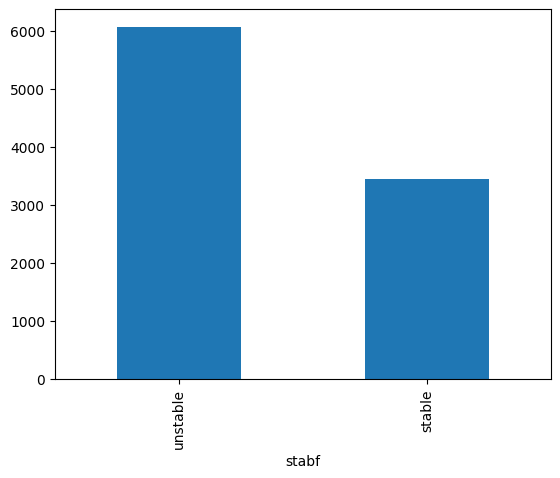

In [457]:
unique_stabf = df['stabf'].unique()
print(f"Unique values in stabf: {unique_stabf}")
_ = df['stabf'].value_counts().plot(kind='bar')

Verificamos que stabf solo tiene los valores 'unstable' y 'stable'

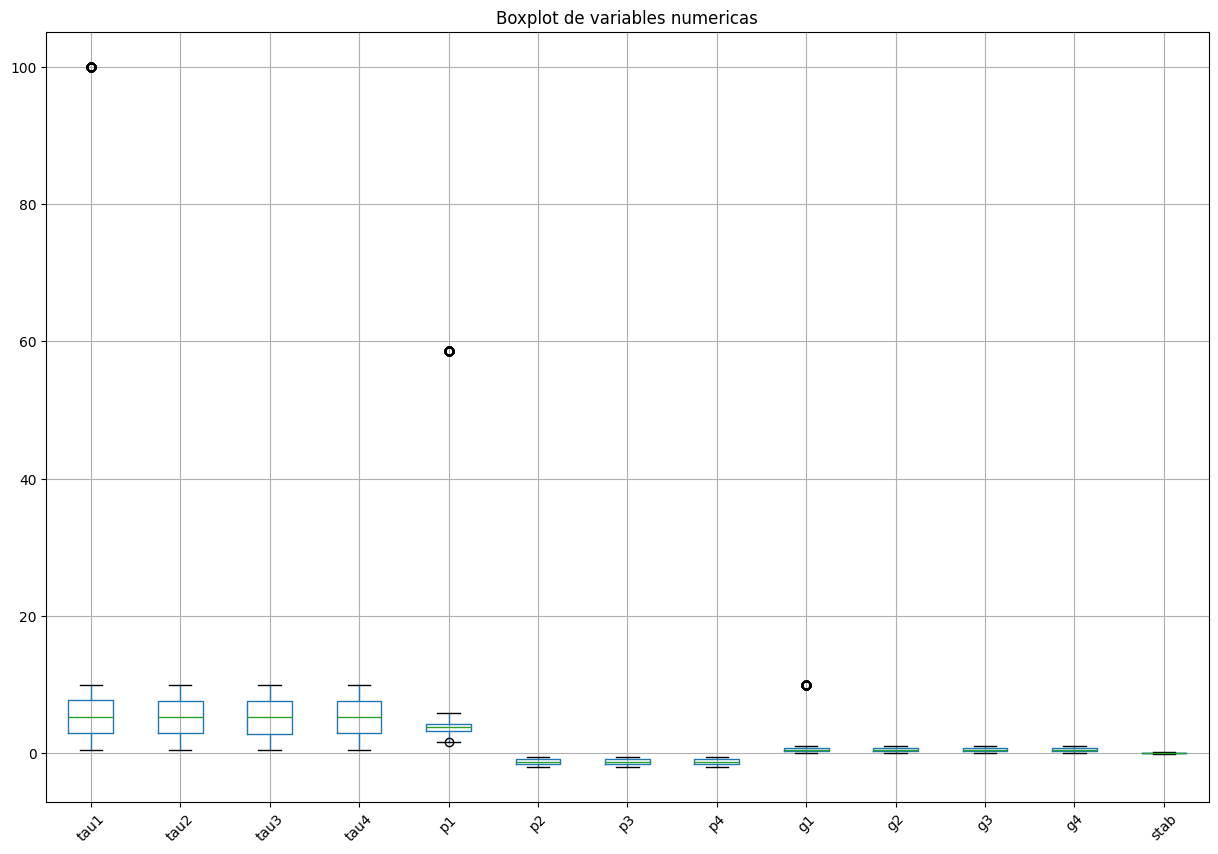

In [458]:
# Hacer un boxplot de las variables numericas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot(rot=45)
plt.title('Boxplot de variables numericas')
plt.show()

## Pretratamiento de datos

In [459]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

In [460]:
cols = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab']

# Imputar la media sin considerar outliers
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col].mean()
    df.fillna({col: mean_value}, inplace=True)

In [461]:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [462]:
# Eliminar filas con valores invalidos (se eliminan todas las filas que tengan algun valor invalido)
invalids = [tau1_invalid, p1_invalid, p2_invalid, p3_invalid, p4_invalid, 
            g1_invalid, g2_invalid, g3_invalid, g4_invalid, stabf_invalid]

for invalid in invalids:
    df = df[~df.index.isin(invalid.index)]

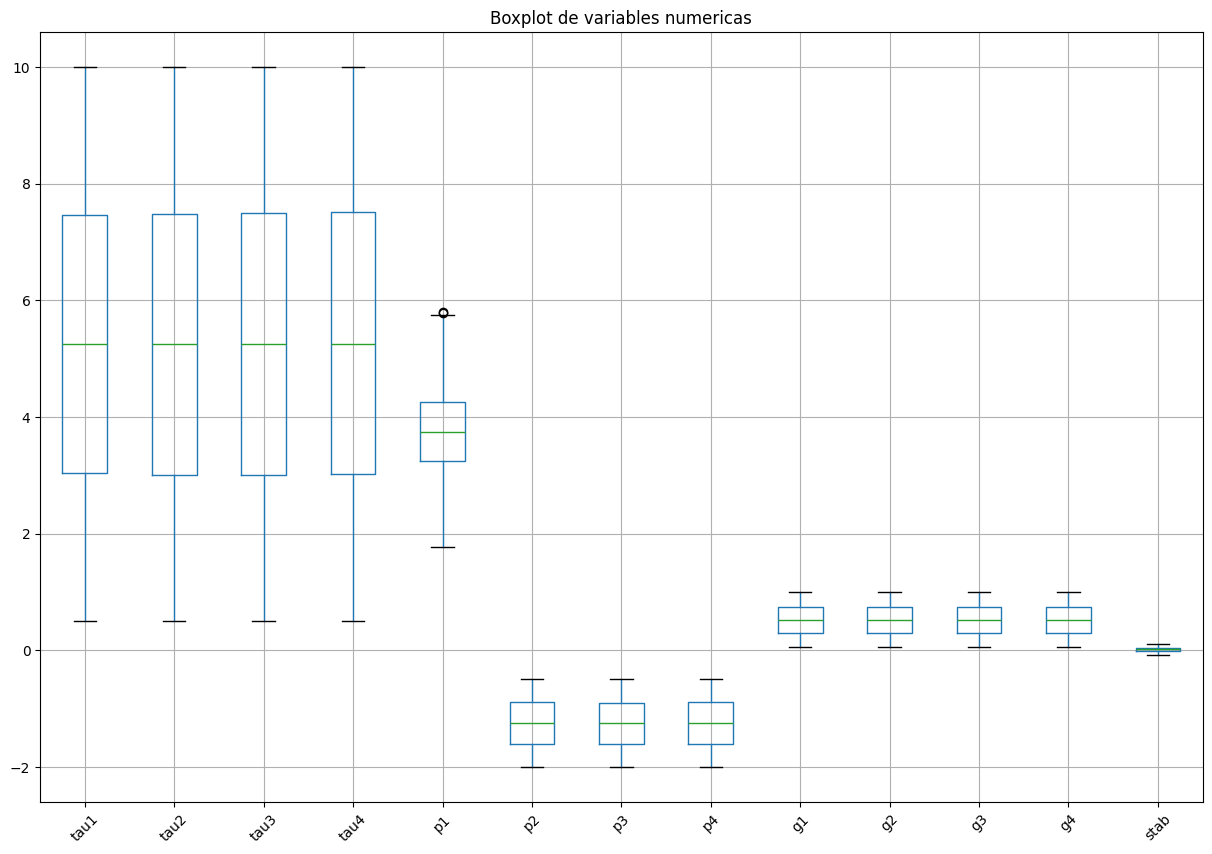

In [463]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot(rot=45)
plt.title('Boxplot de variables numericas')
plt.show()

In [464]:
# find unique values in stabf
unique_stabf = df['stabf'].unique()
print(f"Unique values in stabf: {unique_stabf}")

nan_stabf_count = df['stabf'].isna().sum()
print(f"Cantidad de filas donde stabf es nan: {nan_stabf_count}")

# Codificacion de variables categoricas (stabf)
df['stabf'] = df['stabf'].map({'stable': 0, 'unstable': 1})

# Cantidad de filas finales
print(f"Cantidad de filas finales: {len(df)}")

Unique values in stabf: ['unstable' nan 'stable']
Cantidad de filas donde stabf es nan: 487
Cantidad de filas finales: 9694


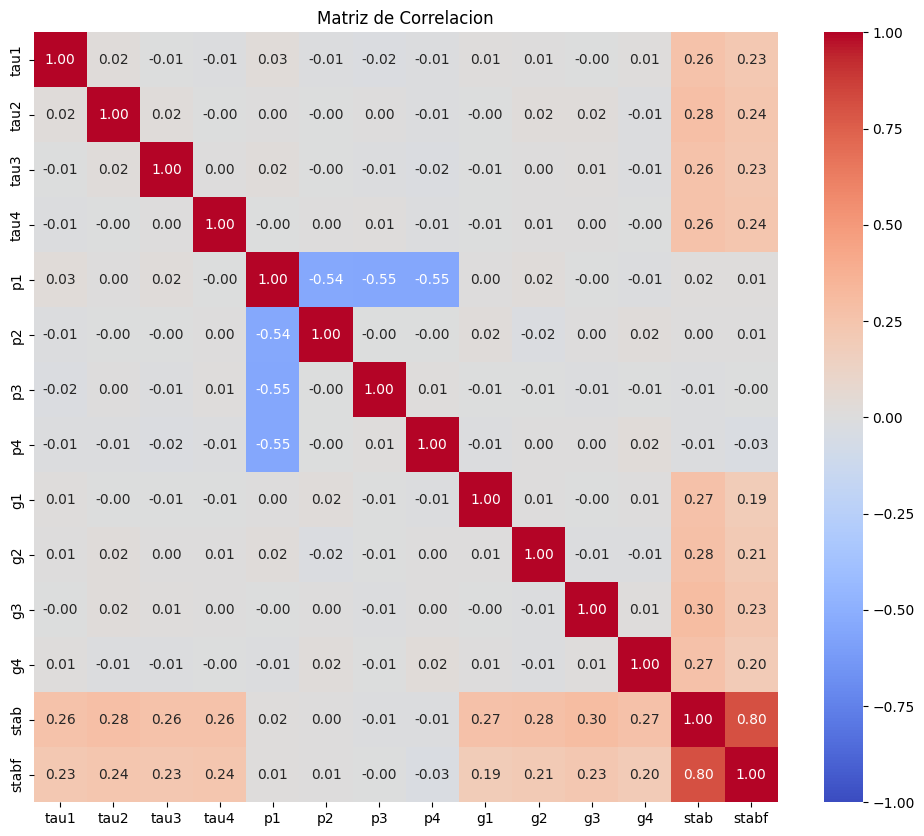

In [465]:
# Matriz de correlacion
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
# Color siempre entre -1 y 1
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlacion')
plt.show()

Como tiene muchisima correlacion (se puede calcular) stabf con stab decidimos borrarlo. 

In [466]:
# Eliminar columna stabf
drop_cols = ['stabf', 'p1', 'p2', 'p3', 'p4']
for col in drop_cols:
    df.drop(col, axis=1, inplace=True)

## Estudio mediante PCA

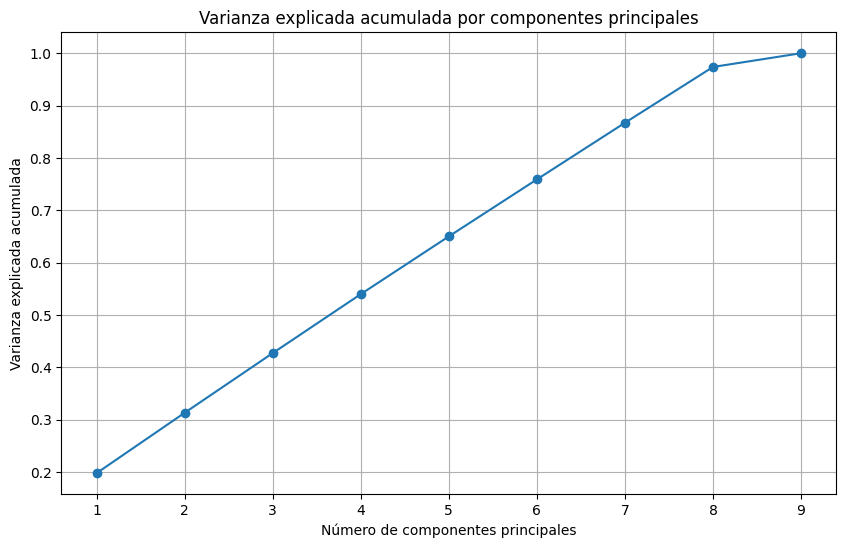

In [467]:
# Normalizacion de datos

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

n = 9
pca = PCA(n_components=n)
pca.fit(df_scaled)
pca.explained_variance_ratio_

# Graficar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()

        PC1    PC2
tau1  0.326  0.362
tau2  0.366 -0.305
tau3  0.323 -0.487
tau4  0.313 -0.228
g1    0.320  0.448
g2    0.341 -0.097
g3    0.372 -0.183
g4    0.318  0.530
stab  0.938  0.012


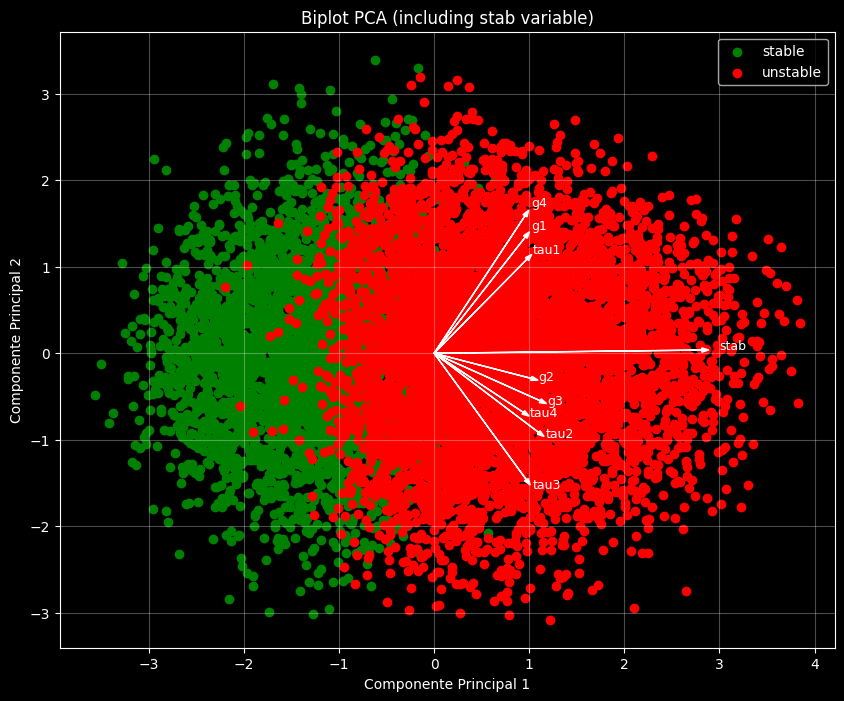

In [483]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Include ALL variables (including stab) in PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Add stability labels based on stab column for coloring
df_pca['stability'] = df['stab'].apply(lambda x: 'stable' if x <= 0 else 'unstable').values

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])]
)
loadings_df.index = df.columns
print(loadings_df.round(3))

# Set dark theme
plt.style.use('dark_background')

plt.figure(figsize=(10, 8))

# Plot with colors: green for stable, red for unstable
colors = {'stable': 'green', 'unstable': 'red'}
for stability, group in df_pca.groupby('stability'):
    plt.scatter(group['PC1'], group['PC2'], 
                c=colors[stability], 
                label=stability)

plt.title('Biplot PCA (including stab variable)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Draw loadings in white (now INCLUDING stab variable)
for i, col in enumerate(df.columns):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, 
              color='white', head_width=0.05)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, col, 
             color='white', fontsize=9)

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Reset to default style for subsequent plots
plt.style.use('default')


## Modelo predictivo

In [475]:
df_features = df.drop('stab', axis=1)

### Random Forest

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Stable       0.88      0.81      0.84       659
    Unstable       0.91      0.94      0.92      1280

    accuracy                           0.90      1939
   macro avg       0.89      0.88      0.88      1939
weighted avg       0.90      0.90      0.90      1939


Overall Accuracy: 0.8963 (89.63%)


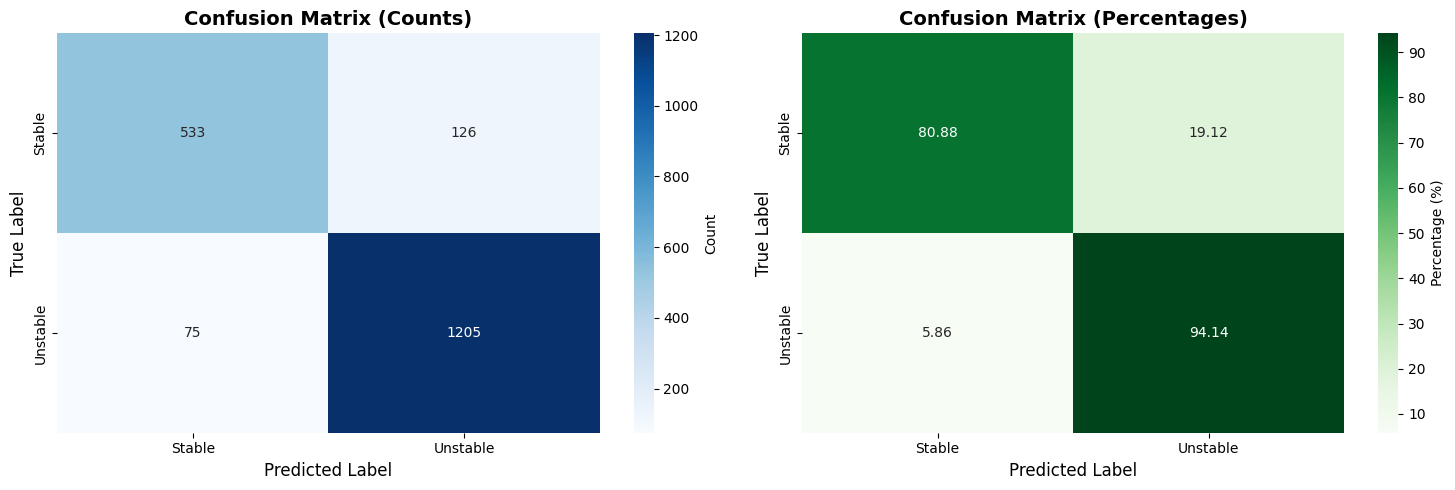


True Negatives (Stable correctly predicted): 533
False Positives (Stable predicted as Unstable): 126
False Negatives (Unstable predicted as Stable): 75
True Positives (Unstable correctly predicted): 1205


In [476]:
# Entrenar modelo de clasificacion
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df_features
y = df['stab'].apply(lambda x: 0 if x <= 0 else 1)  # 0 for stable, 1 for unstable  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Classification Report
print("="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['Stable', 'Unstable']))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap with counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stable', 'Unstable'],
            yticklabels=['Stable', 'Unstable'],
            cbar_kws={'label': 'Count'},
            ax=axes[0])
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Heatmap with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=['Stable', 'Unstable'],
            yticklabels=['Stable', 'Unstable'],
            cbar_kws={'label': 'Percentage (%)'},
            ax=axes[1])
axes[1].set_title('Confusion Matrix (Percentages)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print(f"True Negatives (Stable correctly predicted): {cm[0,0]}")
print(f"False Positives (Stable predicted as Unstable): {cm[0,1]}")
print(f"False Negatives (Unstable predicted as Stable): {cm[1,0]}")
print(f"True Positives (Unstable correctly predicted): {cm[1,1]}")
print("="*60)


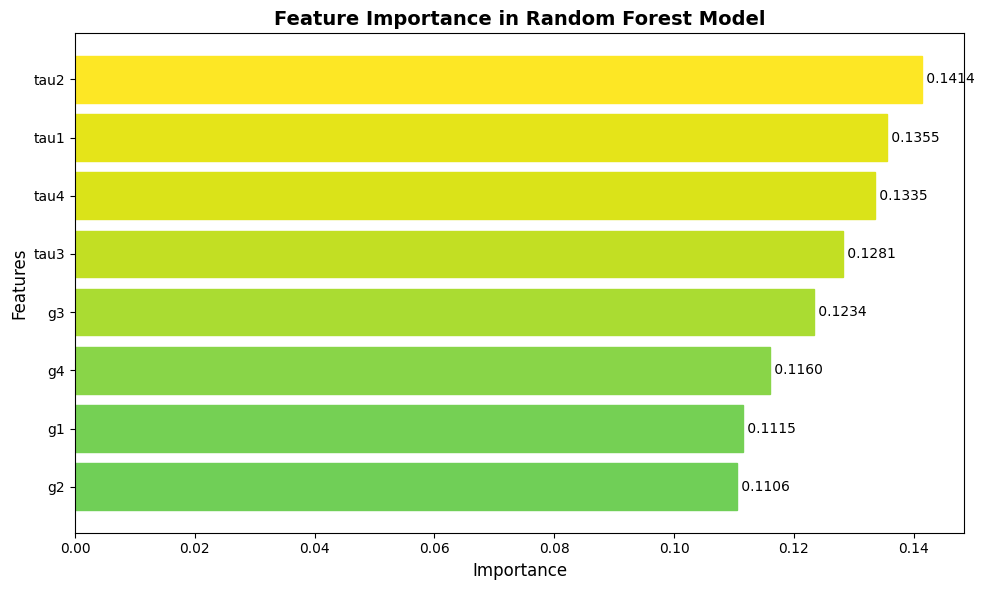


Top 5 Most Important Features:
feature  importance
   tau2    0.141366
   tau1    0.135479
   tau4    0.133492
   tau3    0.128147
     g3    0.123377


In [477]:
# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['feature'], feature_importance['importance'])

# Color bars by importance level
colors = plt.cm.viridis(feature_importance['importance'] / feature_importance['importance'].max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    plt.text(row['importance'], i, f" {row['importance']:.4f}", 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head().to_string(index=False))


### Regresión

LINEAR MODEL CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Stable       0.75      0.67      0.71       659
    Unstable       0.84      0.89      0.86      1280

    accuracy                           0.81      1939
   macro avg       0.80      0.78      0.79      1939
weighted avg       0.81      0.81      0.81      1939


Overall Accuracy: 0.8133 (81.33%)


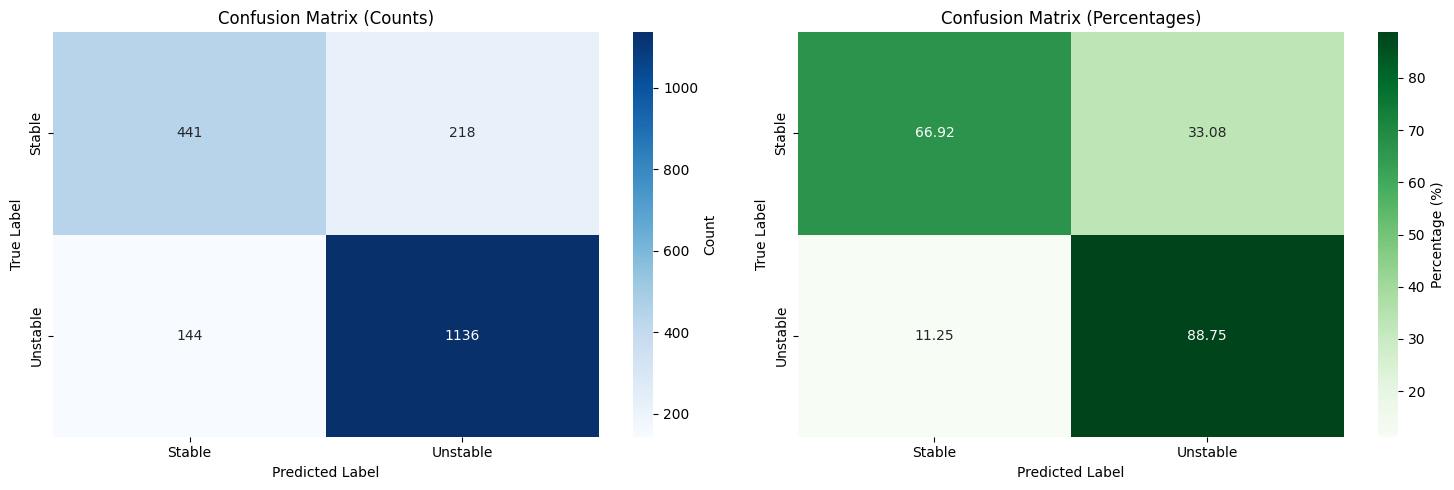


True Negatives (Stable correctly predicted): 441
False Positives (Stable predicted as Unstable): 218
False Negatives (Unstable predicted as Stable): 144
True Positives (Unstable correctly predicted): 1136


In [490]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X = df_features
y = df['stab'].apply(lambda x: 0 if x <= 0 else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear classifier
linear_clf = LogisticRegression(max_iter=1000, random_state=42)
linear_clf.fit(X_train, y_train)

# Predict
y_pred_linear = linear_clf.predict(X_test)

# Classification report
print("="*60)
print("LINEAR MODEL CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_linear, target_names=['Stable', 'Unstable']))

# Accuracy
accuracy = accuracy_score(y_test, y_pred_linear)
print(f"\nOverall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_linear)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stable', 'Unstable'],
            yticklabels=['Stable', 'Unstable'],
            cbar_kws={'label': 'Count'},
            ax=axes[0])
axes[0].set_title('Confusion Matrix (Counts)')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=['Stable', 'Unstable'],
            yticklabels=['Stable', 'Unstable'],
            cbar_kws={'label': 'Percentage (%)'},
            ax=axes[1])
axes[1].set_title('Confusion Matrix (Percentages)')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print(f"True Negatives (Stable correctly predicted): {cm[0,0]}")
print(f"False Positives (Stable predicted as Unstable): {cm[0,1]}")
print(f"False Negatives (Unstable predicted as Stable): {cm[1,0]}")
print(f"True Positives (Unstable correctly predicted): {cm[1,1]}")
print("="*60)


In [487]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X)
print("MSE:", mean_squared_error(y, y_pred))
print("R²:", r2_score(y, y_pred))

MSE: 0.0005347474539450765
R²: 0.5859169660632927


### Neural network

In [478]:
# Neural network model for Electrical Stability

import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split

# Prepare data from our dataframe
X = df_features.values  # Convert to numpy array
y = df['stab'].apply(lambda x: 0 if x <= 0 else 1).values  # 0 for stable, 1 for unstable

# Split data: 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

# Define neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
print("\nModel Architecture:")
model.summary()

# Train
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n{'='*60}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"{'='*60}")


Training set: 5816 samples
Validation set: 1939 samples
Test set: 1939 samples
Number of features: 8

Model Architecture:


/home/santisil/personal/learn/analisis-datos/ElectricalStability/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6580 - loss: 0.6251 - val_accuracy: 0.7153 - val_loss: 0.5712
Epoch 2/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6972 - loss: 0.5691 - val_accuracy: 0.7715 - val_loss: 0.5284
Epoch 3/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7259 - loss: 0.5427 - val_accuracy: 0.7818 - val_loss: 0.5085
Epoch 4/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7352 - loss: 0.5259 - val_accuracy: 0.7855 - val_loss: 0.4802
Epoch 5/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7576 - loss: 0.5083 - val_accuracy: 0.7829 - val_loss: 0.4767
Epoch 6/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7555 - loss: 0.4900 - val_accuracy: 0.8020 - val_loss: 0.4397
Epoch 7/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7739 - loss: 0.4698 - val_accuracy: 0.7968 - val_loss: 0.4348
Epoch 8/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7780 - loss: 0.4557 - val_accuracy: 0.

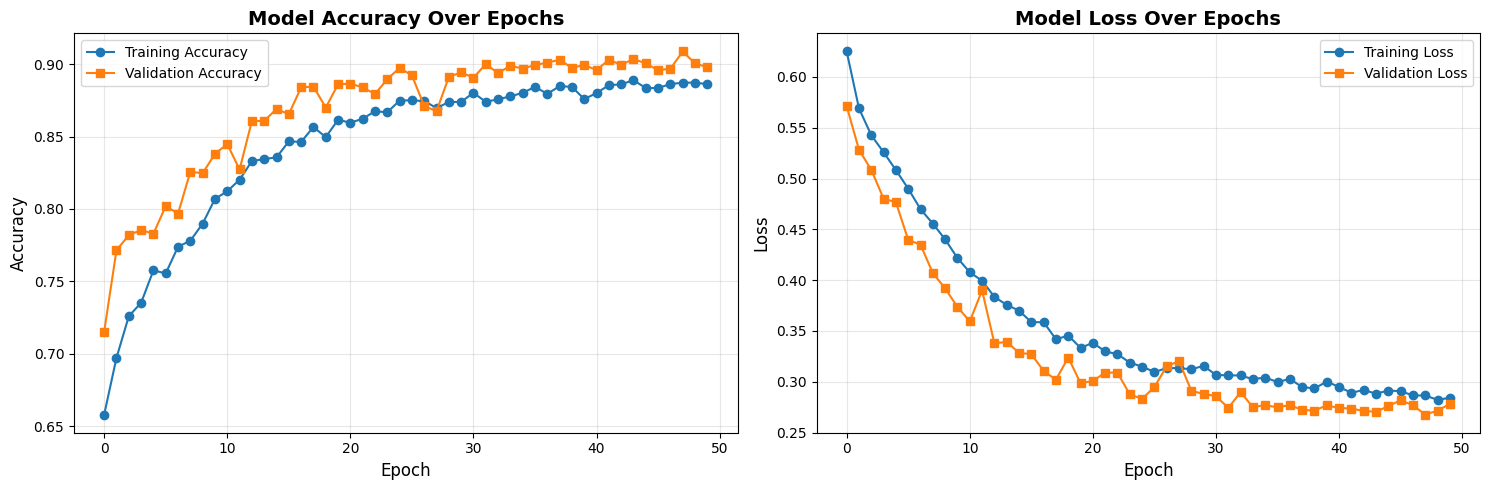


Best validation accuracy: 0.9087 at epoch 48


In [479]:
# Visualize training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find best epoch
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = max(history.history['val_accuracy'])
print(f"\nBest validation accuracy: {best_val_acc:.4f} at epoch {best_epoch}")


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
DEEP LEARNING MODEL - CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Stable       0.80      0.90      0.85       660
    Unstable       0.94      0.89      0.91      1279

    accuracy                           0.89      1939
   macro avg       0.87      0.89      0.88      1939
weighted avg       0.89      0.89      0.89      1939



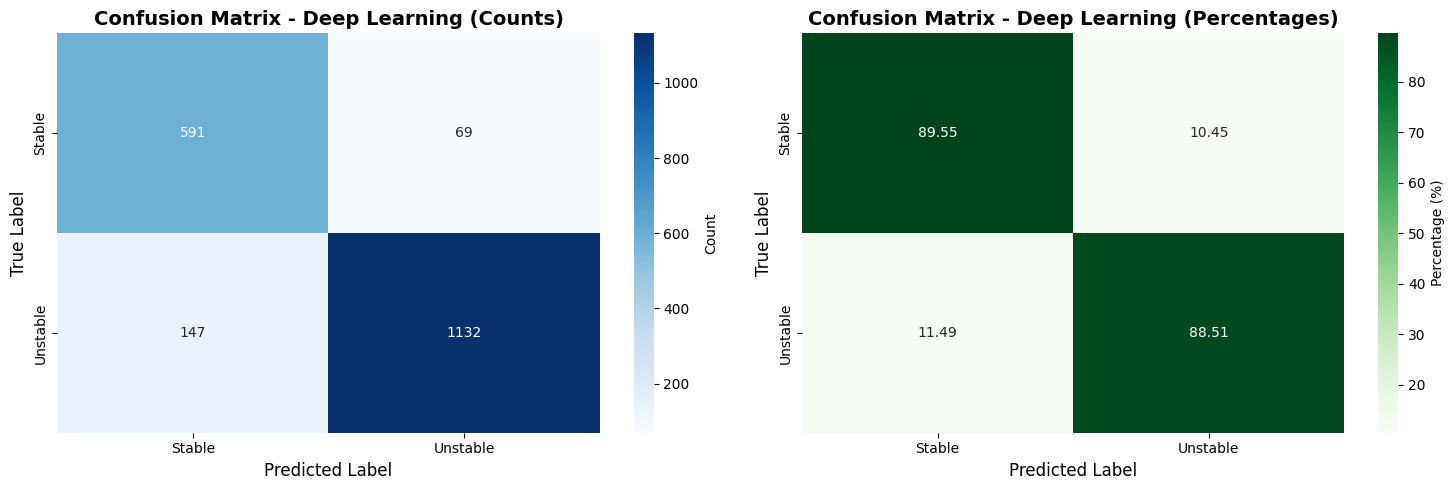


True Negatives (Stable correctly predicted): 591
False Positives (Stable predicted as Unstable): 69
False Negatives (Unstable predicted as Stable): 147
True Positives (Unstable correctly predicted): 1132


In [480]:
# Predictions and Confusion Matrix for Deep Learning Model
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Classification Report
print("="*60)
print("DEEP LEARNING MODEL - CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['Stable', 'Unstable']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap with counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stable', 'Unstable'],
            yticklabels=['Stable', 'Unstable'],
            cbar_kws={'label': 'Count'},
            ax=axes[0])
axes[0].set_title('Confusion Matrix - Deep Learning (Counts)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Heatmap with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=['Stable', 'Unstable'],
            yticklabels=['Stable', 'Unstable'],
            cbar_kws={'label': 'Percentage (%)'},
            ax=axes[1])
axes[1].set_title('Confusion Matrix - Deep Learning (Percentages)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print(f"True Negatives (Stable correctly predicted): {cm[0,0]}")
print(f"False Positives (Stable predicted as Unstable): {cm[0,1]}")
print(f"False Negatives (Unstable predicted as Stable): {cm[1,0]}")
print(f"True Positives (Unstable correctly predicted): {cm[1,1]}")
print("="*60)
